# Comparison between the temperatures of regular and imperfect 


In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


## get data

In [9]:
# get temperature for regular infinite
data_path = Path("../../data/regular/infinite-size/").resolve()
file = 'regular_all_inv_Tc.csv'
df_infinite_inv_tc = pd.read_csv(os.path.join(data_path,file))
# get temperature for regular finite
data_path = Path("../../data/regular/finite-size/").resolve()
file = 'finite_all_inv_Tc.csv'
df_finite_inv_tc = pd.read_csv(os.path.join(data_path,file))

## begin plots

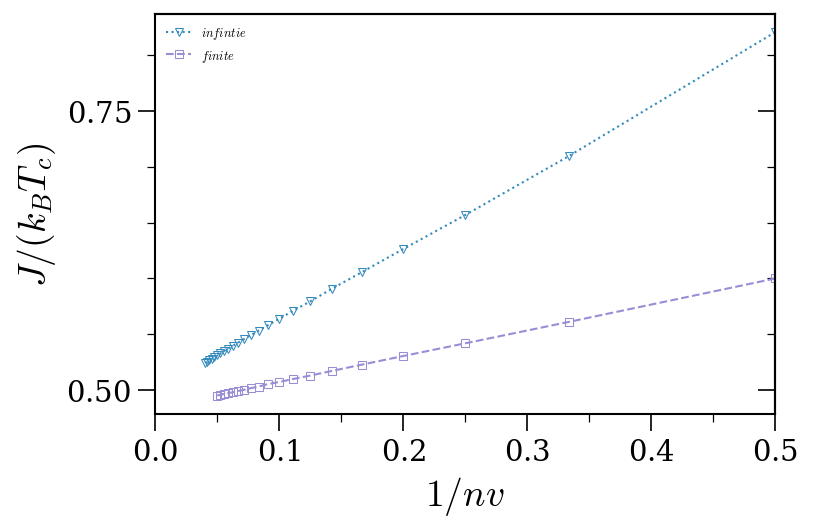

In [11]:
# Load the default style.
style.use("default")
# rcParams["text.usetex"] = False
markers = ["o","v","s","P","p","*","h","D","X","8"]
line_styles = ["solid","dotted","dashed","dashdot",
               (0,(1,1)),(0,(5,1)),(0,(3,1,1,1)),(0,(3,1,1,1,1,1)),(0,(1,10)),(0,(5,10)),(0,(3,10,1,10))]

# fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
fig1: Figure = pyplot.figure(figsize=(12*(4/9), 12), dpi=150)

grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])


# ---- Set plots ---- #
x_data = df_infinite_inv_tc['1/nv']

y_data_infinite = df_infinite_inv_tc['P1.9']
y_data_finite = df_finite_inv_tc['P1.9']

ax.plot(x_data, y_data_infinite, marker=markers[1],
               color='C'+str(1),
               mfc='none',
               mew=0.5,
               lw=1,
               linestyle=line_styles[1],
               label = r"${}$".format(r'infintie')
           )
ax.plot(x_data, y_data_finite, marker=markers[2],
               color='C'+str(2),
               mfc='none',
               mew=0.5,
               lw=1,
               linestyle=line_styles[2],
               label = r"${}$".format(r'finite')
           )

# ---- Configurations plots ---- #
# Set major ticks for x axis
major_xticks = np.arange(1, 2, 0.2)

# Set minor ticks for x axis
minor_xticks = np.arange(1, 2, 0.1)

# Set major ticks for y axis
major_yticks = np.arange(0, 1, 0.25)

# Set minor ticks for y axis
minor_yticks = np.arange(0, 1, 0.05)

# ticks configuration
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$1/nv$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$J/(k_BT_c)$")
# ax.axvline(x=1,linestyle='--')

# ax.set_ylim(0,0.6)
ax.set_xlim(0, 0.5)

ax.legend(
          loc ="upper left",
          fontsize = 6,
          frameon=False
)

# ticks for the top axes
ax.tick_params(which='both',top=False,right=False)
ax.tick_params(which='minor',size=4)
ax.tick_params(which='major',size=8)
ax2 = ax.secondary_xaxis('top')
ax2.tick_params(which='both',direction='in',labeltop=False)
ax2.tick_params(which='minor',size=4)
ax2.tick_params(which='major',size=8)
ax2.set_ticks(major_xticks)
ax2.set_ticks(minor_xticks, minor=True)

# ticks for the right axes
ax3 = ax.secondary_yaxis('right')
ax3.tick_params(which='both',direction='in',labelright=False)
ax3.tick_params(which='minor',size=4)
ax3.tick_params(which='major',size=8)
ax3.set_ticks(major_yticks)
ax3.set_ticks(minor_yticks,minor=True)

pyplot.draw()
pyplot.show()